In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import datetime
%matplotlib inline
from tqdm import tqdm_notebook
pd.set_option('display.max_columns', None)
from scipy import optimize, special, stats

In [1]:
from gldpy import GLD

In [3]:
import warnings
warnings.simplefilter("ignore")

Examples 1-3: using gldpy for fitting Generalized Lambda Distribution to data generated from other known distributions.

Example 4: using gldpy for fitting Generalized Lambda Distribution  to arbitrary curve.

# Example 1. VSL parameterization

Generate data from Frechet left (or Weibull maximum) continuous distribution and fit GLD of VSL parameterization using different methods of estimating parameters.

In [4]:
np.random.seed(123)
data = stats.weibull_max.rvs(10,size = 500)

In [5]:
gld = GLD('VSL')

Method of moments:

Optimization terminated successfully.
         Current function value: 0.000074
         Iterations: 41
         Function evaluations: 80

Sample moments:  (-0.9532135768936262, 0.013248703263398866, 0.660973980233348, 3.632195727195358)
Fitted moments:  (-0.9532135768936261, 0.013248703263398868, 0.6609004684180145, 3.6321297032883626)

Parameters:  [-1.006291812535809, 0.149170787439659, 0.6970040754931619, 0.1073183844408784]

Goodness-of-Fit
KstestResult(statistic=0.0250182079203983, pvalue=0.9130403961060372)
Power_divergenceResult(statistic=1.408, pvalue=0.9853249713362828)


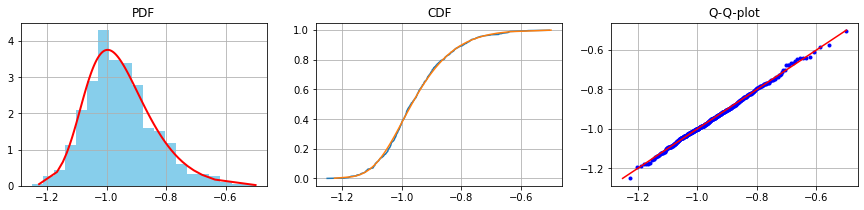

In [6]:
param_MM = gld.fit_MM(data, [0.5,1],bins_hist = 20, maxiter=1000, maxfun=1000)

Method of percentiles:

Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 17
         Function evaluations: 34

Sample statistics:  (-0.9692939619798273, 0.29427441523577036, 0.6861127857061395, 0.4756983919016085)
Fitted statistics:  (-0.9692939619798273, 0.29427441523577036, 0.6861127857061393, 0.47570438751813243)

Parameters:  [-0.99900801  0.11429442  0.67928111 -0.12890625]

Goodness-of-Fit
KstestResult(statistic=0.01961815616614726, pvalue=0.9906092518948184)
Power_divergenceResult(statistic=1.504, pvalue=0.9821708569050303)


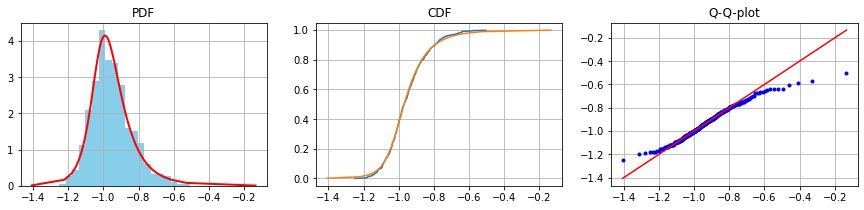

In [7]:
param_PM = gld.fit_PM(data, [1],bins_hist = 20, maxiter=1000, maxfun=1000)

Method of L-moments:


Sample L-moments:  (-0.9532135768936261, 0.06380534422314108, 0.11745163806604451, 0.14787855724159615)
Fitted L-moments:  (-0.9532135768936261, 0.06380534422314096, 0.11745163806604828, 0.1478785572415837)

Parameters:  [-1.00314419  0.13863904  0.6902571   0.05654863]

Goodness-of-Fit
KstestResult(statistic=0.019781880604816227, pvalue=0.989648873151914)
Power_divergenceResult(statistic=1.9520000000000002, pvalue=0.9624491770060711)


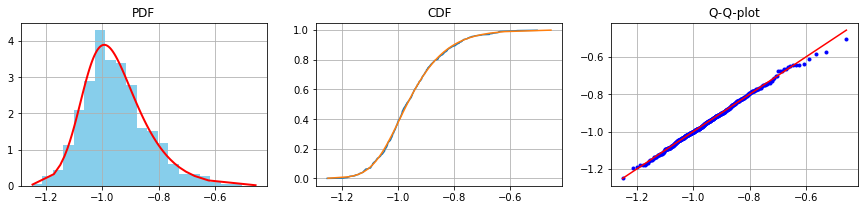

In [8]:
param_LMM = gld.fit_LMM(data,bins_hist = 20, maxiter=1000, maxfun=1000)

Method of maximum likilehood, initial values for optimization are estimated by grid search:

Optimization terminated successfully.
         Current function value: -389.874242
         Iterations: 116
         Function evaluations: 218

Initial point for Maximum Likilehood Method:  [-1.00281312  0.06836046  0.66666667 -0.33333333]
Estimated by  grid

Initial negative log-likelihood function:  -350.4931416896296
Optimized negative log-likelihood function: :  -389.8742417512067

Parameters:  [-1.0019199   0.14250592  0.68466285  0.07914084]

Goodness-of-Fit
KstestResult(statistic=0.022482845234000348, pvalue=0.9621711056810648)
Power_divergenceResult(statistic=1.6, pvalue=0.978644392433846)


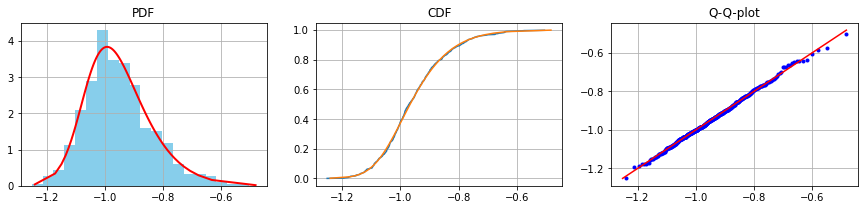

In [9]:
param_ML = gld.fit_ML(data,bins_hist = 20, maxiter=1000, maxfun=1000)

Method of maximum product spacing, initial values for optimization are estimated by grid search:

Optimization terminated successfully.
         Current function value: 6.762702
         Iterations: 87
         Function evaluations: 187

Initial point for Maximum Product of Spacing Method:  [-1.00281312  0.06836046  0.66666667 -0.33333333]
Estimated by  grid

Initial negative logarithm of mean spacing:  6.8446187855511695
Optimized negative logarithm of mean spacing:  6.762702017765008

Parameters:  [-1.00119741  0.14493247  0.68598508  0.08471127]

Goodness-of-Fit
KstestResult(statistic=0.02754365468412312, pvalue=0.8425626292372779)
Power_divergenceResult(statistic=2.656, pvalue=0.9148994017262423)


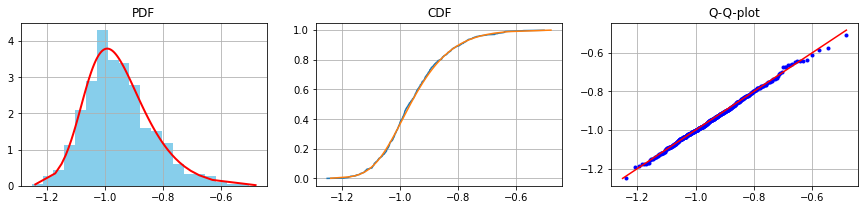

In [10]:
param_MPS = gld.fit_MPS(data,bins_hist = 20, maxiter=1000, maxfun=1000)

Starship method, initial values for optimization are estimated by grid search:

Optimization terminated successfully.
         Current function value: 0.154350
         Iterations: 139
         Function evaluations: 239

Initial point for Starship Method:  [-1.00281312  0.06836046  0.66666667 -0.33333333]
Estimated by  grid

Initial KS-statistic:  12.409645346572233
Optimized KS-statistic :  0.15435033546805244

Parameters:  [-1.00297274  0.13449525  0.69230213  0.02913117]

Goodness-of-Fit
KstestResult(statistic=0.01974589670444421, pvalue=0.9898658156879748)
Power_divergenceResult(statistic=2.112, pvalue=0.953382012517725)


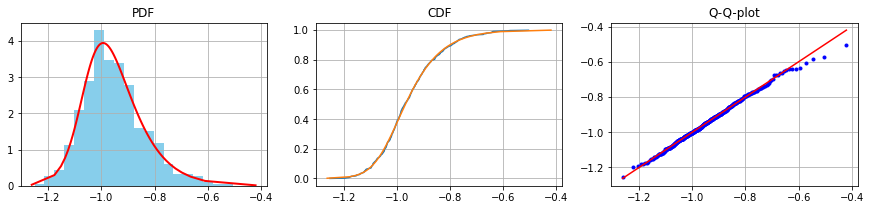

In [11]:
param_star = gld.fit_starship(data,bins_hist = 20, maxiter=1000, maxfun=1000)

Comparing parameters estimated by different methods:

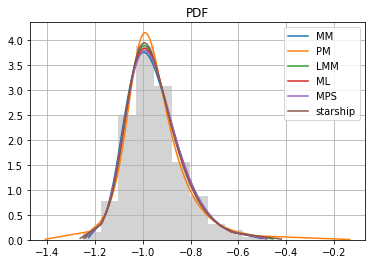

In [12]:
gld.plot_pdf([param_MM, param_PM,param_LMM, param_ML, param_MPS, param_star ], data, names= ['MM', 'PM', 'LMM','ML', 'MPS', 'starship'], ymin=0.001, ymax=0.999,)

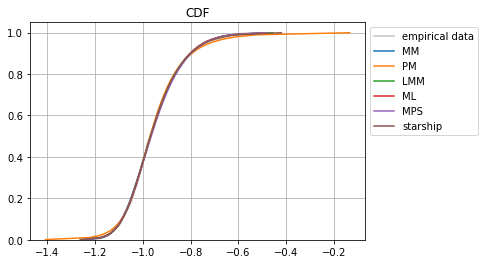

In [13]:
gld.plot_cdf([param_MM, param_PM,param_LMM, param_ML, param_MPS, param_star ], data, names= ['MM', 'PM', 'LMM','ML', 'MPS', 'starship'], ymin=0.001, ymax=0.999,)

# Example 2. RS parameterization

Generate data from  F continuous distribution and fit GLD of RS parameterization using different methods of estimating parameters.

In [14]:
np.random.seed(123)
data =  (stats.f.rvs(10,10,size = 500))


In [15]:
gld = GLD('RS')

Method of moments:

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 152
         Function evaluations: 289

Sample moments:  (1.2440044069097314, 0.8328254333493885, 2.62422637430932, 15.981329652086364)
Fitted moments:  (1.2440044069097314, 0.8328254333493887, 2.624226374551242, 15.981329652007275)

Parameters:  [0.4737627336386381, -0.13015486494722106, -0.004299108994709588, -0.09466898992999424]

Goodness-of-Fit
KstestResult(statistic=0.04107772605090816, pvalue=0.3600515531310968)
Power_divergenceResult(statistic=5.664, pvalue=0.5794830822526563)


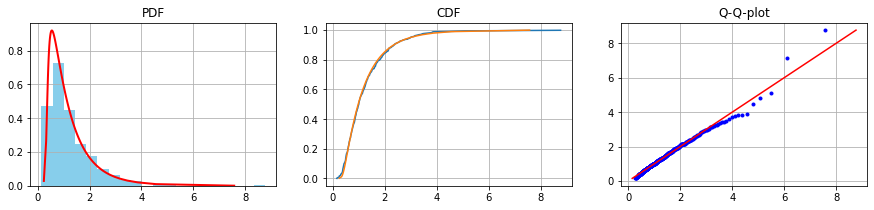

In [16]:
param_MM = gld.fit_MM(data, [-0.1,-0.1],bins_hist = 20, maxiter=10000, maxfun=10000, xtol = 10**(-10))

Method of percentiles:

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 77
         Function evaluations: 140

Sample statistics:  (0.9937890639762905, 1.9134484035112227, 0.418670284188379, 0.5055430780122859)
Fitted statistics:  (0.9937890639762905, 1.9134484035112227, 0.4186702401252646, 0.5048358960223026)

Parameters:  [0.43325742 0.03236809 0.00132924 0.02776949]

Goodness-of-Fit
KstestResult(statistic=0.020104547018985397, pvalue=0.9875504562680981)
Power_divergenceResult(statistic=2.176, pvalue=0.9494601747969068)


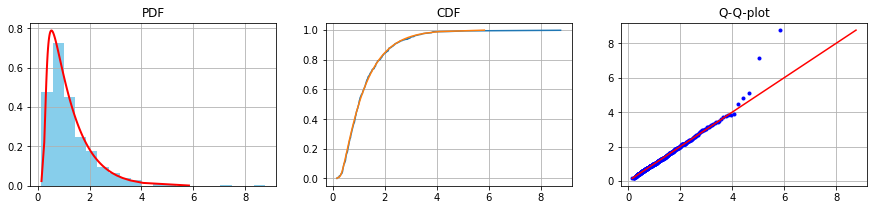

In [17]:
param_PM = gld.fit_PM(data, [0.1,1],bins_hist = 20, maxiter=1000, maxfun=1000)

Method of L-moments:

Optimization terminated successfully.
         Current function value: 0.022257
         Iterations: 72
         Function evaluations: 142

Sample L-moments:  (1.2440044069097314, 0.4453942559749153, 0.31570077214500536, 0.18857827876242314)
Fitted L-moments:  (1.2440044069097316, 0.4453942559749153, 0.3011095834993649, 0.16632103164320663)

Parameters:  [4.37711093e-01 1.22815862e-03 5.21619532e-05 1.04350308e-03]

Goodness-of-Fit
KstestResult(statistic=0.01942953980804682, pvalue=0.9916328769523526)
Power_divergenceResult(statistic=1.952, pvalue=0.9624491770060711)


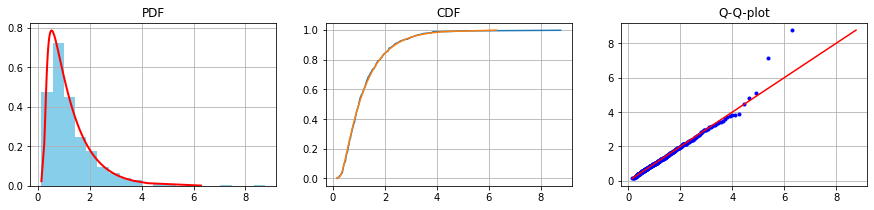

In [18]:
param_LMM = gld.fit_LMM(data,[0.11,0.1],bins_hist = 20, maxiter=1000, maxfun=1000)

Method of maximum likelyhood, initial values for optimization are estimated by method of L-moments:

Optimization terminated successfully.
         Current function value: 496.738334
         Iterations: 47
         Function evaluations: 96

Initial point for Maximum Likilehood Method:  [ 0.49876961 -0.08492949 -0.00502028 -0.06396667]
Estimated by  LMM

Initial negative log-likelihood function:  496.7486722106168
Optimized negative log-likelihood function: :  496.7383344046676

Parameters:  [ 0.49679595 -0.08656626 -0.00502481 -0.06512491]

Goodness-of-Fit
KstestResult(statistic=0.016298108303172687, pvalue=0.999364171776571)
Power_divergenceResult(statistic=1.7600000000000002, pvalue=0.9719231952172751)


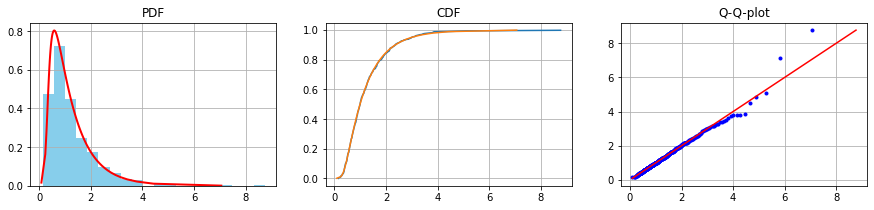

In [19]:
param_ML = gld.fit_ML(data,[0.1,0.1], method = 'LMM', bins_hist = 20, maxiter=1000, maxfun=1000)

Method of maximum product spacing, initial values for optimization are estimated by method of moments:

Optimization terminated successfully.
         Current function value: 6.808314
         Iterations: 72
         Function evaluations: 144

Initial point for Maximum Product of Spacing Method:  [ 0.47387133 -0.13018062 -0.00430796 -0.09468098]
Estimated by  MM

Initial negative logarithm of mean spacing:  6.838757041031482
Optimized negative logarithm of mean spacing:  6.808313854185133

Parameters:  [ 0.50287238 -0.08866009 -0.00522901 -0.06592413]

Goodness-of-Fit
KstestResult(statistic=0.015939463232336082, pvalue=0.9995739882526516)
Power_divergenceResult(statistic=1.472, pvalue=0.9832632171902878)


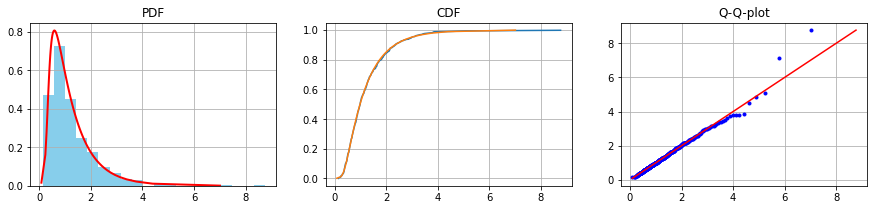

In [20]:
param_MPS = gld.fit_MPS(data,[-0.1,-0.1], method = 'MM',bins_hist = 20, maxiter=1000, maxfun=1000)

Starship method, initial values for optimization are estimated by method of percentiles:

Optimization terminated successfully.
         Current function value: 0.186019
         Iterations: 97
         Function evaluations: 181

Initial point for Starship Method:  [0.42974129 0.03606403 0.0014337  0.03111315]
Estimated by  PM

Initial KS-statistic:  0.2692625801852273
Optimized KS-statistic :  0.18601942777331715

Parameters:  [0.45969001 0.03316076 0.00160426 0.02778713]

Goodness-of-Fit
KstestResult(statistic=0.020332554350684817, pvalue=0.9858947090791953)
Power_divergenceResult(statistic=2.912, pvalue=0.8930218179862803)


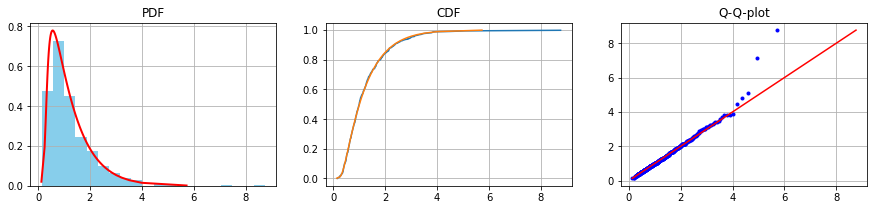

In [21]:
param_star = gld.fit_starship(data,[0.1,0.1], method = 'PM',bins_hist = 20, maxiter=1000, maxfun=1000)

Comparing parameters estimated by different methods:

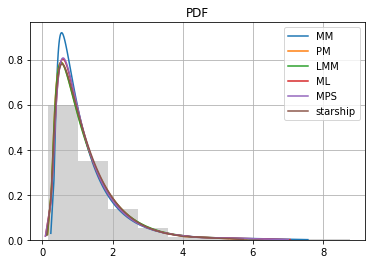

In [22]:
gld.plot_pdf([param_MM, param_PM,param_LMM, param_ML, param_MPS, param_star ], data, names= ['MM', 'PM', 'LMM','ML', 'MPS', 'starship'], ymin=0.001, ymax=0.999,)

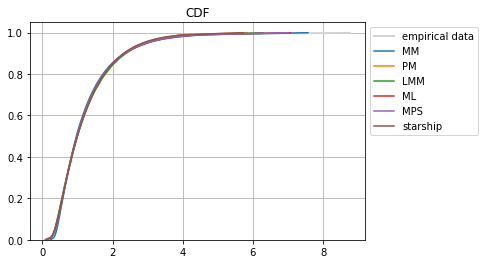

In [23]:
gld.plot_cdf([param_MM, param_PM,param_LMM, param_ML, param_MPS, param_star ], data, names= ['MM', 'PM', 'LMM','ML', 'MPS', 'starship'], ymin=0.001, ymax=0.999,)

# Example 3. FMKL parameterization

Generate data from  Erlang continuous distribution and fit GLD of FMKL parameterization using different methods of estimating parameters.

In [24]:
np.random.seed(123)
data =  (stats.erlang.rvs(2,1,size = 500))

In [25]:
gld = GLD('FMKL')

Method of moments:

Optimization terminated successfully.
         Current function value: 0.000019
         Iterations: 61
         Function evaluations: 115

Sample moments:  (3.0373213344812133, 2.0282209269953557, 1.6623207361849182, 8.319287050362892)
Fitted moments:  (3.0373213344812133, 2.0282209269953557, 1.6623214799704722, 8.319305634737656)

Parameters:  [2.5755951543176105, 1.055903856176383, 0.6765925291730552, -0.07747911451162583]

Goodness-of-Fit
KstestResult(statistic=0.02903152960945643, pvalue=0.7933054163855816)
Power_divergenceResult(statistic=10.528, pvalue=0.160573543674303)


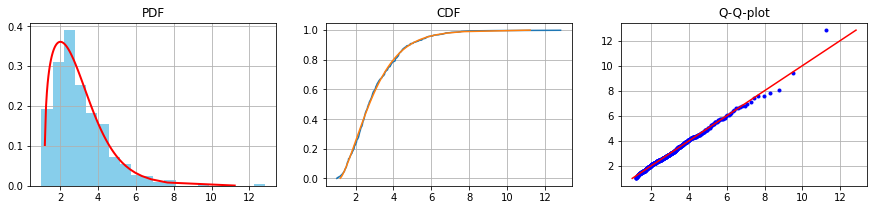

In [26]:
param_MM = gld.fit_MM(data, [1,1],bins_hist = 20, maxiter=1000, maxfun=1000)

Method of percentiles:

Optimization terminated successfully.
         Current function value: 0.000004
         Iterations: 67
         Function evaluations: 128

Sample statistics:  (2.6950275076485437, 3.308517724522331, 0.5245089153548239, 0.5115852058230274)
Fitted statistics:  (2.6950275076485437, 3.3085177245223316, 0.5245053195769167, 0.5115867575954043)

Parameters:  [ 2.54685908  1.11179656  0.63778834 -0.12850309]

Goodness-of-Fit
KstestResult(statistic=0.036044457085315396, pvalue=0.5326521257128761)
Power_divergenceResult(statistic=12.575999999999999, pvalue=0.08313810199676507)


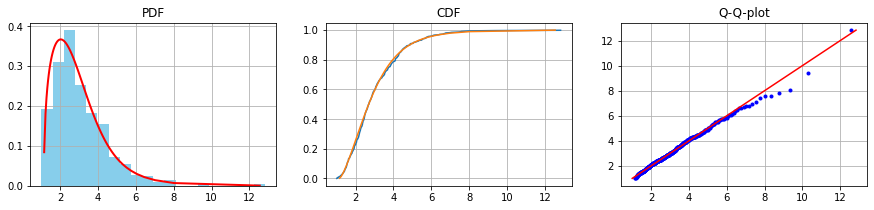

In [27]:
param_PM = gld.fit_PM(data, [1,1],bins_hist = 20, maxiter=1000, maxfun=1000)

Method of L-moments:

Optimization terminated successfully.
         Current function value: 0.000006
         Iterations: 59
         Function evaluations: 108

Sample L-moments:  (3.0373213344812133, 0.7465183433648642, 0.23581906052889018, 0.15432967648182366)
Fitted L-moments:  (3.037321334481213, 0.7465183433648642, 0.23582505193697553, 0.15433166413080082)

Parameters:  [ 2.59860012  1.10477433  0.59879494 -0.09922814]

Goodness-of-Fit
KstestResult(statistic=0.02454413562954183, pvalue=0.9239934169469988)
Power_divergenceResult(statistic=9.888, pvalue=0.19500975957212785)


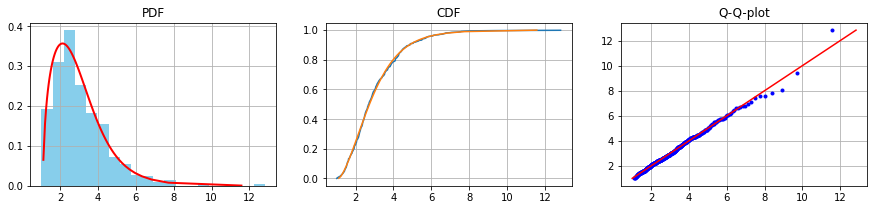

In [28]:
param_LMM = gld.fit_LMM(data,[1,0.1],bins_hist = 20, maxiter=1000, maxfun=1000)

Method of maximum likelihood, initial values for optimization are estimated by method of L-moments:

Optimization terminated successfully.
         Current function value: 793.116602
         Iterations: 114
         Function evaluations: 218

Initial point for Maximum Likilehood Method:  [ 2.52161802  1.09854762  0.59879433 -0.09921409]
Estimated by  LMM

Initial negative log-likelihood function:  795.631185836108
Optimized negative log-likelihood function: :  793.1166017350502

Parameters:  [ 2.63875862  1.1342895   0.52932918 -0.09245864]

Goodness-of-Fit
KstestResult(statistic=0.029373845621321615, pvalue=0.7813754752779215)
Power_divergenceResult(statistic=8.448, pvalue=0.2947504426645951)


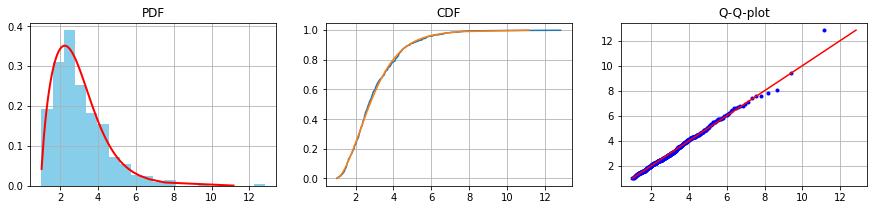

In [29]:
param_ML = gld.fit_ML(data,[0.1,0.1], method = 'LMM', bins_hist = 20, maxiter=1000, maxfun=1000)

Method of maximum product spacing, initial values for optimization are estimated by method of moments:

Optimization terminated successfully.
         Current function value: 6.767976
         Iterations: 63
         Function evaluations: 127

Initial point for Maximum Product of Spacing Method:  [ 2.42126703  1.04323196  0.67666984 -0.0774737 ]
Estimated by  MM

Initial negative logarithm of mean spacing:  6.785453806632066
Optimized negative logarithm of mean spacing:  6.767976313003539

Parameters:  [ 2.6379573   1.12231322  0.54054641 -0.08077871]

Goodness-of-Fit
KstestResult(statistic=0.029432493452898445, pvalue=0.7793127953120382)
Power_divergenceResult(statistic=7.904, pvalue=0.3411352278560917)


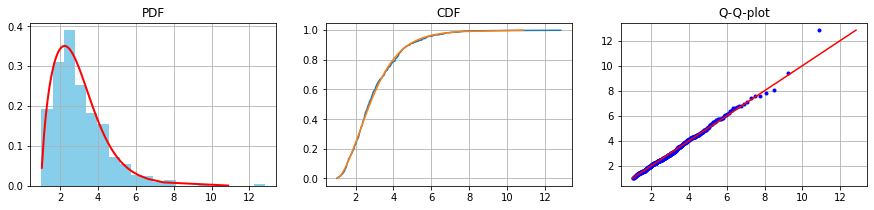

In [30]:
param_MPS = gld.fit_MPS(data,[0.1,0.1], method = 'MM',bins_hist = 20, maxiter=1000, maxfun=1000)

Starship method, initial values for optimization are estimated by method of percentiles:

Optimization terminated successfully.
         Current function value: 0.325688
         Iterations: 145
         Function evaluations: 268

Initial point for Starship Method:  [ 2.42465213  1.10329379  0.6377894  -0.12850139]
Estimated by  PM

Initial KS-statistic:  5.2000984885467005
Optimized KS-statistic :  0.3256878615906089

Parameters:  [ 2.60784246  1.20198551  0.50910927 -0.16942614]

Goodness-of-Fit
KstestResult(statistic=0.024904025987106837, pvalue=0.9157501200316136)
Power_divergenceResult(statistic=9.728, pvalue=0.20451855672127892)


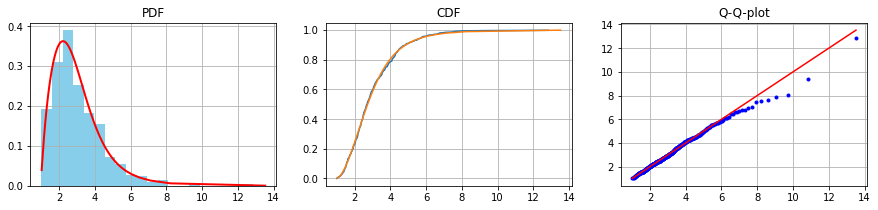

In [31]:
param_star = gld.fit_starship(data,[0.1,0.1], method = 'PM',bins_hist = 20, maxiter=1000, maxfun=1000)

Comparing parameters estimated by different methods:

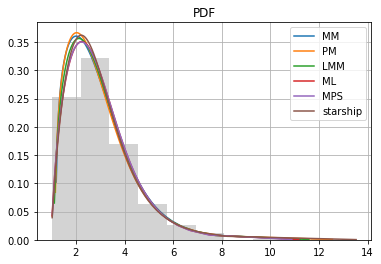

In [32]:
gld.plot_pdf([param_MM, param_PM,param_LMM, param_ML, param_MPS, param_star ], data, names= ['MM', 'PM', 'LMM','ML', 'MPS', 'starship'], ymin=0.001, ymax=0.999,)

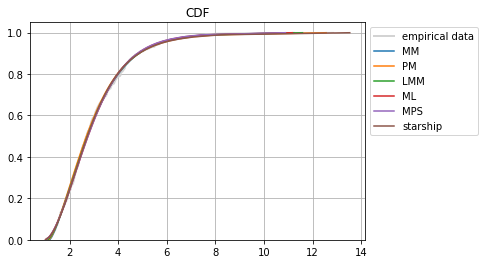

In [33]:
gld.plot_cdf([param_MM, param_PM,param_LMM, param_ML, param_MPS, param_star ], data, names= ['MM', 'PM', 'LMM','ML', 'MPS', 'starship'], ymin=0.001, ymax=0.999,)

# Example 4. Curve fitting using GLD

## 4.1 Use VSL parameterization

Take some curve given by coordinates (density of F distribution as an example) and fit GLD of VSL parameterization to the curve.

In [34]:
x = np.linspace(0,10,100)
y = stats.f.pdf(x,10,10)

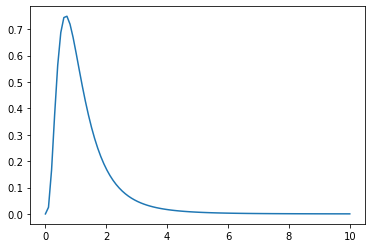

In [35]:
plt.plot(x,y)

In [36]:
gld = GLD('VSL')

Without optimization phase:


MSE:  0.004637784366660546

Parameters:  [ 0.40919444  0.78826739  0.99375564 -0.09205056]
C:  0.9994495475804732


(array([ 0.40919444,  0.78826739,  0.99375564, -0.09205056]),
 0.9994495475804732,
 0)

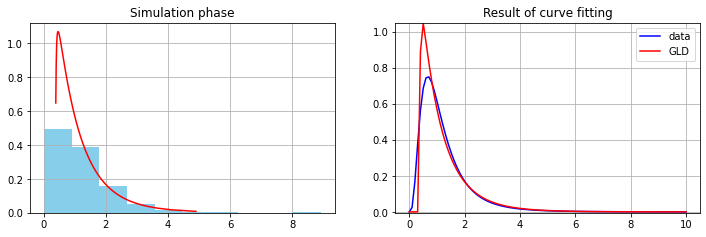

In [37]:
gld.fit_curve(x,y,[1,1],N_gen=1000,optimization_phase=False)

With optimization phase:

Optimization terminated successfully.
         Current function value: 0.000036
         Iterations: 148
         Function evaluations: 255

MSE:  3.616779990622468e-05

Parameters:  [0.54409266 0.81362499 0.89265662 0.0176151 ]
C:  0.9872503479761265


(array([0.54409266, 0.81362499, 0.89265662, 0.0176151 ]),
 0.9872503479761265,
 0)

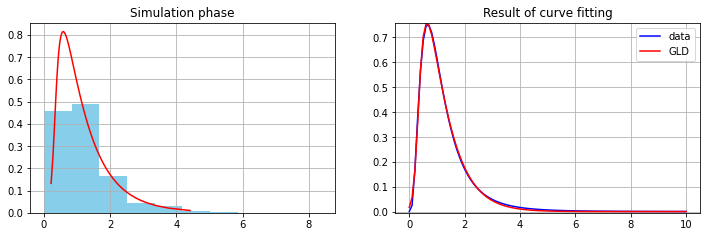

In [38]:
gld.fit_curve(x,y,[1,1],N_gen=1000,optimization_phase=True)

Repeat exercises for another curve (which is not really true density because area under the curve is not 1)

In [39]:
x = np.linspace(0,2,100)
y = stats.f.pdf(x,10,10)

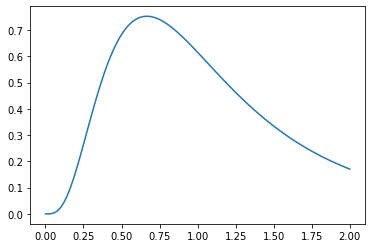

In [40]:
plt.plot(x,y)

With optimization phase:

Optimization terminated successfully.
         Current function value: 0.000048
         Iterations: 170
         Function evaluations: 284

MSE:  4.7903840014895105e-05

Parameters:  [0.56758769 0.79868091 0.86088835 0.12846785]
C:  0.9378635956183942


(array([0.56758769, 0.79868091, 0.86088835, 0.12846785]),
 0.9378635956183942,
 0)

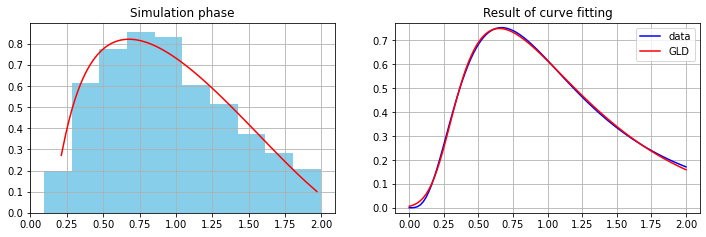

In [41]:
gld.fit_curve(x,y,[1,1],N_gen=1000,optimization_phase=True)

With optimization phase and shift:

Optimization terminated successfully.
         Current function value: 0.000041
         Iterations: 160
         Function evaluations: 287

MSE:  4.051701293950123e-05

Parameters:  [0.56438647 0.81026409 0.86597369 0.10914559]
C:  0.9701486463478197
shift:  -0.01


(array([0.56438647, 0.81026409, 0.86597369, 0.10914559]),
 0.9701486463478197,
 -0.01)

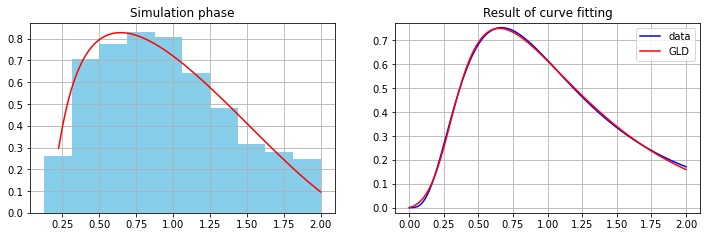

In [42]:
gld.fit_curve(x,y,[1,1],N_gen=1000,optimization_phase=True, shift = True)

One more example of curve:

In [43]:
x = np.linspace(0.5,2,100)
y = stats.f.pdf(x,10,10)

With optimization phase:

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 205
         Function evaluations: 346

MSE:  8.777918125526153e-08

Parameters:  [ 0.57672376  0.75870042  0.83617875 -0.0900271 ]
C:  1.050465821898627


(array([ 0.57672376,  0.75870042,  0.83617875, -0.0900271 ]),
 1.050465821898627,
 0)

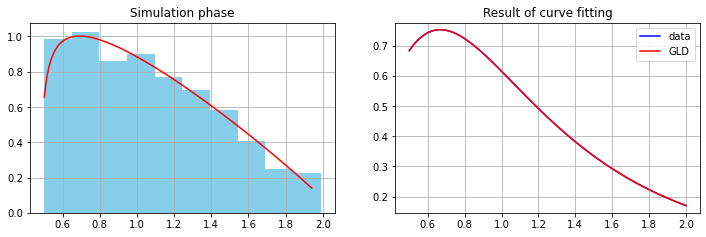

In [44]:
gld.fit_curve(x,y,[1,1],N_gen=1000,optimization_phase=True)

With optimization phase and shift:

Optimization terminated successfully.
         Current function value: 0.000008
         Iterations: 146
         Function evaluations: 248

MSE:  7.556659458138681e-06

Parameters:  [0.60493759 0.61572572 0.82924235 0.2988451 ]
C:  0.5332128501102589
shift:  0.16070568510897804


(array([0.60493759, 0.61572572, 0.82924235, 0.2988451 ]),
 0.5332128501102589,
 0.16070568510897804)

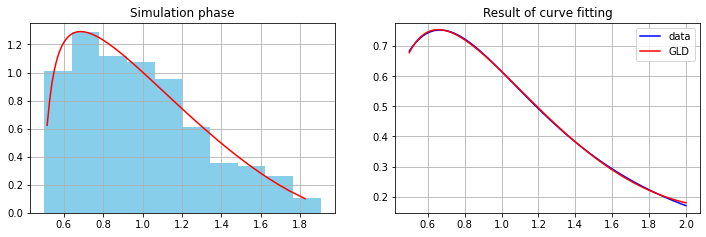

In [45]:
gld.fit_curve(x,y,[1,1],N_gen=1000,optimization_phase=True, shift = True)

## 4.2 Use RS parameterization

Fit GLD of RS parameterization to the curve

In [46]:
gld = GLD('RS')

With optimization phase:

Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 526
         Function evaluations: 833

MSE:  2.0648639974866413e-06

Parameters:  [5.72224504e-01 2.62483110e-04 2.85299708e-05 1.75028111e-04]
C:  0.9900971767494714


(array([5.72224504e-01, 2.62483110e-04, 2.85299708e-05, 1.75028111e-04]),
 0.9900971767494714,
 0)

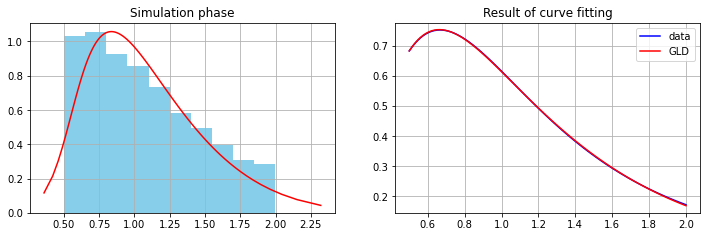

In [47]:
gld.fit_curve(x,y,[0.1,0.1],method='PM', N_gen = 10000, optimization_phase=True)

With optimization phase and shift:

Optimization terminated successfully.
         Current function value: 0.000176
         Iterations: 342
         Function evaluations: 574

MSE:  0.00017575042644701145

Parameters:  [7.00542256e-01 9.96488507e-05 9.67078097e-05 2.53872544e-05]
C:  1.2801629767898803
shift:  0.16070568510897804


(array([7.00542256e-01, 9.96488507e-05, 9.67078097e-05, 2.53872544e-05]),
 1.2801629767898803,
 0.16070568510897804)

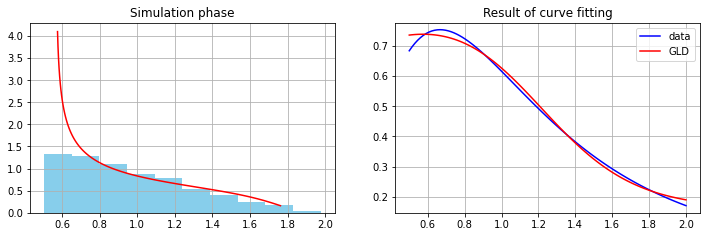

In [48]:
gld.fit_curve(x,y,[1,1],method='PM', optimization_phase=True, shift = True)

## 4.3 Use FMKL parameterization

Fit GLD of FMKL parameterization to the curve

In [49]:
gld = GLD('FMKL')

With optimization phase:

Optimization terminated successfully.
         Current function value: 0.000367
         Iterations: 332
         Function evaluations: 549

MSE:  0.0003672582601024198

Parameters:  [ -1.57546412   0.84071094 -13.53554976   0.22967783]
C:  9.38960975027585


(array([ -1.57546412,   0.84071094, -13.53554976,   0.22967783]),
 9.38960975027585,
 0)

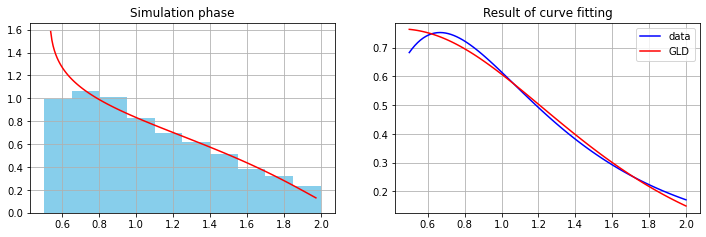

In [50]:
gld.fit_curve(x,y,[1,1], N_gen= 10000,optimization_phase=True)

With optimization phase and shift:

Optimization terminated successfully.
         Current function value: 0.000036
         Iterations: 393
         Function evaluations: 632

MSE:  3.64610734586743e-05

Parameters:  [0.86326313 3.10272874 0.80355827 0.10753404]
C:  0.49239660411416863
shift:  0.16070568510897804


(array([0.86326313, 3.10272874, 0.80355827, 0.10753404]),
 0.49239660411416863,
 0.16070568510897804)

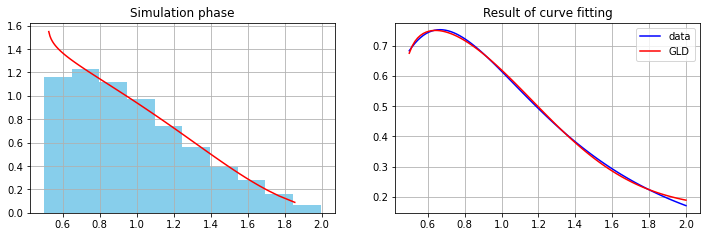

In [51]:
gld.fit_curve(x,y,[1,1], N_gen= 10000,optimization_phase=True, shift = True)